In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix



# Transfer Learning

**Transfer learning** is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second, related task. It leverages pre-trained models, saving time and improving performance, especially when training data is limited.

However, **remember** that transfer learning does **not always guarantee higher accuracy** compared to a well-designed custom **CNN architecture**. In some cases, your own CNN model may perform better depending on the specific dataset and task.



In [ ]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 123

train_dir = r'../Dataset/Balanced_Train'
test_dir = r'../Dataset/Test'

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False
)



train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds_raw.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)

class_names = test_ds_raw.class_names


Found 31155 files belonging to 5 classes.
Using 24924 files for training.
Found 31155 files belonging to 5 classes.
Using 6231 files for validation.
Found 4339 files belonging to 5 classes.


# DenseNet

In [ ]:
freeze_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
freeze_model.trainable = False  # Freeze all layers

# Transfer learning model
model_dense_freeze = models.Sequential([
    freeze_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(8, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax')  # 5 classes
])

# Compile
model_dense_freeze.compile(optimizer='adamW', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(patience=4, restore_best_weights=True),
    ModelCheckpoint(r'..\Model\dense_model_freeze.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
]

model_dense_freeze.fit( 
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

model_dense_freeze.fit( 
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

Epoch 1/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7475 - loss: 0.7358
Epoch 1: val_accuracy improved from -inf to 0.90997, saving model to ..\Model\dense_model_freeze.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 1748s 2s/step - accuracy: 0.7476 - loss: 0.7355 - val_accuracy: 0.9100 - val_loss: 0.2768
Epoch 2/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9142 - loss: 0.2624
Epoch 2: val_accuracy improved from 0.90997 to 0.91847, saving model to ..\Model\dense_model_freeze.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 1764s 2s/step - accuracy: 0.9142 - loss: 0.2624 - val_accuracy: 0.9185 - val_loss: 0.2259
Epoch 3/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9290 - loss: 0.2090
Epoch 3: val_accuracy improved from 0.91847 to 0.92730, saving model to ..\Model\dense_model_freeze.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 1793s 2s/step - accuracy: 0.9290 - loss: 0.2090 - val_accuracy: 0.9273 - val_loss: 0.2034
Epoch 4/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9344 - loss: 0.1876
Epoch 4: val_accuracy did not improve from 0.92730
779/779 ━━━━━━━━━━━━━━━━━━━━ 1815s 2s/step - accuracy: 0.9344 - loss: 0.1876 - val_accuracy: 0.9052 - val_loss: 0.2551
Epoch 5/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9373 - loss: 0.1773
Epoch 5: val_accuracy did not improve from 0.92730
779/779 ━━━━━━━━━━━━━━━━━━━━ 1860s 2s/step - accuracy: 0.9373 - loss: 0.1773 - val_accuracy: 0.9079 - val_loss: 0.2421
Epoch 6/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9430 - loss: 0.1665
Epoch 6: val_accuracy improved from 0.92730 to 0.94624, saving model to ..\Model\dense_model_freeze.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 1951s 3s/step - accuracy: 0.9430 - loss: 0.1665 - val_accuracy: 0.9462 - val_loss: 0.1516
Epoch 7/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9433 - loss: 0.1600
Epoch 7: val_accuracy did not improve from 0.94624
779/779 ━━━━━━━━━━━━━━━━━━━━ 1610s 2s/step - accuracy: 0.9433 - loss: 0.1600 - val_accuracy: 0.9002 - val_loss: 0.2866
Epoch 8/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9439 - loss: 0.1596
Epoch 8: val_accuracy did not improve from 0.94624
779/779 ━━━━━━━━━━━━━━━━━━━━ 1645s 2s/step - accuracy: 0.9439 - loss: 0.1596 - val_accuracy: 0.9385 - val_loss: 0.1735
Epoch 9/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9434 - loss: 0.1564
Epoch 9: val_accuracy improved from 0.94624 to 0.94704, saving model to ..\Model\dense_model_freeze.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 1735s 2s/step - accuracy: 0.9434 - loss: 0.1564 - val_accuracy: 0.9470 - val_loss: 0.1473
Epoch 10/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9466 - loss: 0.1503
Epoch 10: val_accuracy did not improve from 0.94704
779/779 ━━━━━━━━━━━━━━━━━━━━ 1818s 2s/step - accuracy: 0.9466 - loss: 0.1503 - val_accuracy: 0.9321 - val_loss: 0.1834
Epoch 11/30
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9482 - loss: 0.1517

In [12]:

model=models.load_model(r"D:\Internship\Blood_Type_Classification_CNN\Model\dense_model_freeze_1.h5")

136/136 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step
Test Accuracy: 0.8444


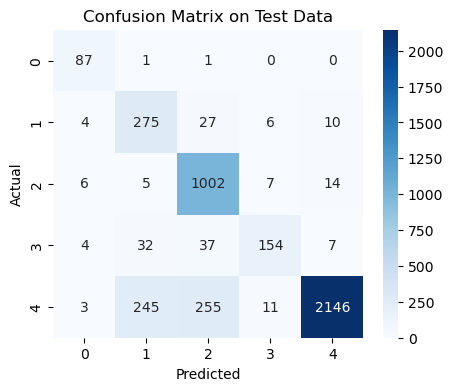

              precision    recall  f1-score   support

    Basophil       0.84      0.98      0.90        89
  Eosinophil       0.49      0.85      0.62       322
  Lymphocyte       0.76      0.97      0.85      1034
    Monocyte       0.87      0.66      0.75       234
  Neutrophil       0.99      0.81      0.89      2660

    accuracy                           0.84      4339
   macro avg       0.79      0.85      0.80      4339
weighted avg       0.89      0.84      0.85      4339



In [13]:
# Predict
y_pred = model.predict(test_ds)
y_pred_classes = y_pred.argmax(axis=1)

# Get true labels
y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)
y_true = np.argmax(y_true, axis=1)  

# Accuracy
acc = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {acc:.4f}") 

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Data")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=class_names))
